In [ ]:
pip install sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
dfkompasHoaks = pd.read_csv("dataset_kompas_hoaks (1).csv", sep=",")
dfkompas = pd.read_csv("dataset_kompas (1).csv", sep=",")
dfdetik = pd.read_csv("dataset_detik (1).csv")
# dfp6 = pd.read_csv("dataset.csv")

In [ ]:
# dfkompasHoaks.columns = ['title', 'link','date','content','is_fake','media_bias']
# dfkompasHoaks.drop(columns=['hapus','hapus2'], inplace=True)
dfkompasHoaks

,title,link,date,content,is_fake,media_bias
0,Harimau Mati Tertabrak Kendaraan di Tol Pekanb...,https://www.kompas.com/cekfakta/read/2024/05/1...,2024-05-18,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral
1,Mantan PM Jepang Dibunuh karena Tidak Patuh pa...,https://www.kompas.com/cekfakta/read/2024/05/1...,2024-05-18,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral
2,Prabowo-Gibran Batal Dilantik oleh MPR,https://www.kompas.com/cekfakta/read/2024/05/1...,2024-05-18,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral
3,Foto Ular Raksasa di Carolina Selatan,https://www.kompas.com/cekfakta/read/2024/05/1...,2024-05-17,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral
4,Warga Rafah Bikin Video Rekayasa Serangan Israel,https://www.kompas.com/cekfakta/read/2024/05/1...,2024-05-17,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral
...,...,...,...,...,...,...
1752,Gunung Gede-Pangrango Meletus dan Menyemburkan...,https://www.kompas.com/cekfakta/read/2022/11/2...,2022-11-22,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral
1753,Presiden Jokowi Pecat Menteri yang Mengatakan ...,https://www.kompas.com/cekfakta/read/2022/11/2...,2022-11-22,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral
1754,Mikrocip Robot dalam Vaksin Covid-19,https://www.kompas.com/cekfakta/read/2022/11/2...,2022-11-22,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral
1755,Penghina Iriana Jokowi Telah Ditangkap,https://www.kompas.com/cekfakta/read/2022/11/2...,2022-11-22,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral


In [ ]:
dfkompas

,title,link,date,content,is_fake,media_bias
0,"Begal Remaja di Bekasi Residivis, Terlibat Kas...",https://megapolitan.kompas.com/read/2024/04/23...,2024-04-23,"BEKASI, KOMPAS.com - MFP (18), remaja di Bekas...",0,netral
1,"Proses di PTUN Masih Berjalan, PDI-P Minta KPU...",https://nasional.kompas.com/read/2024/04/23/18...,2024-04-23,"JAKARTA, KOMPAS.com - Ketua Tim Hukum PDI-P Ga...",0,netral
2,DKPP Verifikasi Aduan Dugaan Ketua KPU Goda An...,https://nasional.kompas.com/read/2024/04/23/18...,2024-04-23,"JAKARTA, KOMPAS.com - Dewan Kehormatan Penyele...",0,netral
3,Mayat Laki-laki dalam Kondisi Membengkak Ditem...,https://megapolitan.kompas.com/read/2024/04/23...,2024-04-23,"DEPOK, KOMPAS.com - Mayat berjenis kelamin lak...",0,netral
4,"Kasus Eddy Hiariej Dinilai Mandek, ICW Minta P...",https://nasional.kompas.com/read/2024/04/23/18...,2024-04-23,"JAKARTA, KOMPAS.com - Indonesia Corruption Wat...",0,netral
...,...,...,...,...,...,...
3010,Tentara AS Meninggal Saat Tinjau Tempat Latiha...,https://nasional.kompas.com/read/2024/04/23/18...,2024-04-23,"JAKARTA, KOMPAS.com - Kepala Pusat Penerangan ...",0,netral
3011,DKPP Terima 200 Aduan Pelanggaran Etik Penyele...,https://nasional.kompas.com/read/2024/04/23/18...,2024-04-23,"JAKARTA, KOMPAS.com - Dewan Kehormatan Penyele...",0,netral
3012,"Nasdem-PKB Sepakat Tutup Buku Lama, Buka Lemba...",https://nasional.kompas.com/read/2024/04/23/18...,2024-04-23,"JAKARTA, KOMPAS.com - Ketua Umum Partai Nasdem...",0,netral
3013,Polisi Tangkap 3 Pelaku Sindikat Pencurian Mot...,https://megapolitan.kompas.com/read/2024/04/23...,2024-04-23,"JAKARTA, KOMPAS.com - Polisi menangkap tiga or...",0,netral


In [ ]:
dfdetik

,title,link,date,content,is_fake,media_bias
0,\nPolisi Tunggu Persetujuan Keluarga Korban Pe...,https://news.detik.com/berita/d-7348286/polisi...,19/05/2024,Tiga jenazah korban pesawat latih jatuh di BSD...,0,netral
1,\nRS Polri soal Kondisi Korban Tewas Pesawat J...,https://news.detik.com/berita/d-7348267/rs-pol...,19/05/2024,"Karumkit Polri Kramat Jati, Brigjen Hariyanto,...",0,netral
2,\nPenjelasan Polri hingga Kemenhub soal Pesawa...,https://news.detik.com/berita/d-7348256/penjel...,19/05/2024,"Pesawat latih jatuh di kawasan BSD, Serpong, T...",0,netral
3,\nPesawat Latih yang Jatuh di BSD Dievakuasi P...,https://news.detik.com/berita/d-7348254/pesawa...,19/05/2024,Puing-puing pesawat latih PK-IFP yang jatuh di...,0,netral
4,\nMereka Berduka Melepas Salim Said Sang Tokoh...,https://news.detik.com/berita/d-7348216/mereka...,19/05/2024,Dunia pers tengah berduka. Prof Salim Said men...,0,netral
...,...,...,...,...,...,...
3995,\nMenanti Putusan MK\n,https://news.detik.com/berita/d-7303333/menant...,22/04/2024,Mahkamah Konstitusi (MK) telah menggelar seran...,0,netral
3996,\nBegini Rekayasa Lalin Sekitar MK Jelang Putu...,https://news.detik.com/berita/d-7303609/begini...,22/04/2024,Polisi menerapkan rekayasa lalu lintas (lalin)...,0,netral
3997,\nTitik-titik Kepadatan di Tol Arah Jakarta Se...,https://news.detik.com/berita/d-7303594/titik-...,22/04/2024,"Lalu lintas di tol Jagorawi, Tol Japek maupun ...",0,netral
3998,"\nDemo Jelang Putusan Sengketa Pilpres, Warga ...",https://news.detik.com/berita/d-7303585/demo-j...,22/04/2024,Aksi unjuk rasa akan digelar di kawasan Jakart...,0,netral


In [ ]:
df = pd.concat([dfkompasHoaks, dfkompas,dfdetik], axis=0, ignore_index=True)
df

,title,link,date,content,is_fake,media_bias
0,Harimau Mati Tertabrak Kendaraan di Tol Pekanb...,https://www.kompas.com/cekfakta/read/2024/05/1...,2024-05-18,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral
1,Mantan PM Jepang Dibunuh karena Tidak Patuh pa...,https://www.kompas.com/cekfakta/read/2024/05/1...,2024-05-18,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral
2,Prabowo-Gibran Batal Dilantik oleh MPR,https://www.kompas.com/cekfakta/read/2024/05/1...,2024-05-18,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral
3,Foto Ular Raksasa di Carolina Selatan,https://www.kompas.com/cekfakta/read/2024/05/1...,2024-05-17,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral
4,Warga Rafah Bikin Video Rekayasa Serangan Israel,https://www.kompas.com/cekfakta/read/2024/05/1...,2024-05-17,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral
...,...,...,...,...,...,...
8767,\nMenanti Putusan MK\n,https://news.detik.com/berita/d-7303333/menant...,22/04/2024,Mahkamah Konstitusi (MK) telah menggelar seran...,0,netral
8768,\nBegini Rekayasa Lalin Sekitar MK Jelang Putu...,https://news.detik.com/berita/d-7303609/begini...,22/04/2024,Polisi menerapkan rekayasa lalu lintas (lalin)...,0,netral
8769,\nTitik-titik Kepadatan di Tol Arah Jakarta Se...,https://news.detik.com/berita/d-7303594/titik-...,22/04/2024,"Lalu lintas di tol Jagorawi, Tol Japek maupun ...",0,netral
8770,"\nDemo Jelang Putusan Sengketa Pilpres, Warga ...",https://news.detik.com/berita/d-7303585/demo-j...,22/04/2024,Aksi unjuk rasa akan digelar di kawasan Jakart...,0,netral


In [ ]:
df = df.dropna()
df

,title,link,date,content,is_fake,media_bias
0,Harimau Mati Tertabrak Kendaraan di Tol Pekanb...,https://www.kompas.com/cekfakta/read/2024/05/1...,2024-05-18,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral
1,Mantan PM Jepang Dibunuh karena Tidak Patuh pa...,https://www.kompas.com/cekfakta/read/2024/05/1...,2024-05-18,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral
2,Prabowo-Gibran Batal Dilantik oleh MPR,https://www.kompas.com/cekfakta/read/2024/05/1...,2024-05-18,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral
3,Foto Ular Raksasa di Carolina Selatan,https://www.kompas.com/cekfakta/read/2024/05/1...,2024-05-17,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral
4,Warga Rafah Bikin Video Rekayasa Serangan Israel,https://www.kompas.com/cekfakta/read/2024/05/1...,2024-05-17,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral
...,...,...,...,...,...,...
8767,\nMenanti Putusan MK\n,https://news.detik.com/berita/d-7303333/menant...,22/04/2024,Mahkamah Konstitusi (MK) telah menggelar seran...,0,netral
8768,\nBegini Rekayasa Lalin Sekitar MK Jelang Putu...,https://news.detik.com/berita/d-7303609/begini...,22/04/2024,Polisi menerapkan rekayasa lalu lintas (lalin)...,0,netral
8769,\nTitik-titik Kepadatan di Tol Arah Jakarta Se...,https://news.detik.com/berita/d-7303594/titik-...,22/04/2024,"Lalu lintas di tol Jagorawi, Tol Japek maupun ...",0,netral
8770,"\nDemo Jelang Putusan Sengketa Pilpres, Warga ...",https://news.detik.com/berita/d-7303585/demo-j...,22/04/2024,Aksi unjuk rasa akan digelar di kawasan Jakart...,0,netral


In [ ]:
df["gabung"] = df['title'] + ' ' + df['content']
df

,title,link,date,content,is_fake,media_bias,gabung
0,Harimau Mati Tertabrak Kendaraan di Tol Pekanb...,https://www.kompas.com/cekfakta/read/2024/05/1...,2024-05-18,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral,Harimau Mati Tertabrak Kendaraan di Tol Pekanb...
1,Mantan PM Jepang Dibunuh karena Tidak Patuh pa...,https://www.kompas.com/cekfakta/read/2024/05/1...,2024-05-18,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral,Mantan PM Jepang Dibunuh karena Tidak Patuh pa...
2,Prabowo-Gibran Batal Dilantik oleh MPR,https://www.kompas.com/cekfakta/read/2024/05/1...,2024-05-18,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral,Prabowo-Gibran Batal Dilantik oleh MPR Berdasa...
3,Foto Ular Raksasa di Carolina Selatan,https://www.kompas.com/cekfakta/read/2024/05/1...,2024-05-17,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral,Foto Ular Raksasa di Carolina Selatan Berdasar...
4,Warga Rafah Bikin Video Rekayasa Serangan Israel,https://www.kompas.com/cekfakta/read/2024/05/1...,2024-05-17,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral,Warga Rafah Bikin Video Rekayasa Serangan Isra...
...,...,...,...,...,...,...,...
8767,\nMenanti Putusan MK\n,https://news.detik.com/berita/d-7303333/menant...,22/04/2024,Mahkamah Konstitusi (MK) telah menggelar seran...,0,netral,\nMenanti Putusan MK\n Mahkamah Konstitusi (MK...
8768,\nBegini Rekayasa Lalin Sekitar MK Jelang Putu...,https://news.detik.com/berita/d-7303609/begini...,22/04/2024,Polisi menerapkan rekayasa lalu lintas (lalin)...,0,netral,\nBegini Rekayasa Lalin Sekitar MK Jelang Putu...
8769,\nTitik-titik Kepadatan di Tol Arah Jakarta Se...,https://news.detik.com/berita/d-7303594/titik-...,22/04/2024,"Lalu lintas di tol Jagorawi, Tol Japek maupun ...",0,netral,\nTitik-titik Kepadatan di Tol Arah Jakarta Se...
8770,"\nDemo Jelang Putusan Sengketa Pilpres, Warga ...",https://news.detik.com/berita/d-7303585/demo-j...,22/04/2024,Aksi unjuk rasa akan digelar di kawasan Jakart...,0,netral,"\nDemo Jelang Putusan Sengketa Pilpres, Warga ..."


In [ ]:
cols = ['gabung'] + [col for col in df if col != 'gabung']
df = df[cols]
df

,gabung,title,link,date,content,is_fake,media_bias
0,Harimau Mati Tertabrak Kendaraan di Tol Pekanb...,Harimau Mati Tertabrak Kendaraan di Tol Pekanb...,https://www.kompas.com/cekfakta/read/2024/05/1...,2024-05-18,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral
1,Mantan PM Jepang Dibunuh karena Tidak Patuh pa...,Mantan PM Jepang Dibunuh karena Tidak Patuh pa...,https://www.kompas.com/cekfakta/read/2024/05/1...,2024-05-18,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral
2,Prabowo-Gibran Batal Dilantik oleh MPR Berdasa...,Prabowo-Gibran Batal Dilantik oleh MPR,https://www.kompas.com/cekfakta/read/2024/05/1...,2024-05-18,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral
3,Foto Ular Raksasa di Carolina Selatan Berdasar...,Foto Ular Raksasa di Carolina Selatan,https://www.kompas.com/cekfakta/read/2024/05/1...,2024-05-17,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral
4,Warga Rafah Bikin Video Rekayasa Serangan Isra...,Warga Rafah Bikin Video Rekayasa Serangan Israel,https://www.kompas.com/cekfakta/read/2024/05/1...,2024-05-17,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral
...,...,...,...,...,...,...,...
8767,\nMenanti Putusan MK\n Mahkamah Konstitusi (MK...,\nMenanti Putusan MK\n,https://news.detik.com/berita/d-7303333/menant...,22/04/2024,Mahkamah Konstitusi (MK) telah menggelar seran...,0,netral
8768,\nBegini Rekayasa Lalin Sekitar MK Jelang Putu...,\nBegini Rekayasa Lalin Sekitar MK Jelang Putu...,https://news.detik.com/berita/d-7303609/begini...,22/04/2024,Polisi menerapkan rekayasa lalu lintas (lalin)...,0,netral
8769,\nTitik-titik Kepadatan di Tol Arah Jakarta Se...,\nTitik-titik Kepadatan di Tol Arah Jakarta Se...,https://news.detik.com/berita/d-7303594/titik-...,22/04/2024,"Lalu lintas di tol Jagorawi, Tol Japek maupun ...",0,netral
8770,"\nDemo Jelang Putusan Sengketa Pilpres, Warga ...","\nDemo Jelang Putusan Sengketa Pilpres, Warga ...",https://news.detik.com/berita/d-7303585/demo-j...,22/04/2024,Aksi unjuk rasa akan digelar di kawasan Jakart...,0,netral


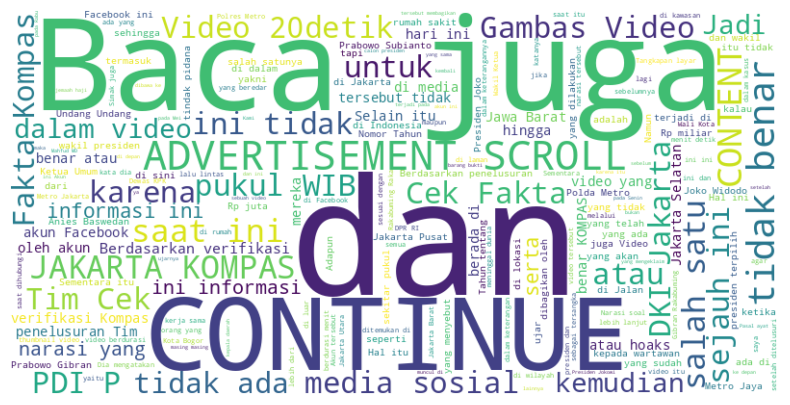

In [ ]:
# Gabungkan teks dari semua baris
text_combined = ' '.join(df['gabung'])

# Buat wordcloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text_combined)

# Tampilkan wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
!pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=9442d1c53df4eda67465d29332f63e2a2d8072d7d6a431e5664d3b702d7e10ef
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [ ]:
import pandas as pd
import re
from bs4 import BeautifulSoup
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter
import time
from tqdm import tqdm
from concurrent.futures import ProcessPoolExecutor

In [ ]:
#Import stopword dari sastrawi

#Membuat stemmer sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# #Membuat stopword sastrawi
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

In [ ]:
def cleaning(text):
    text = str(text)

    # Menghapus tag HTML
    text = BeautifulSoup(text, "html.parser").get_text()

    # Mengubah setiap kata menjadi lowercase
    text = text.lower()

    # Menghapus Link Dengan Pattern http/https
    text = re.sub(r'http\S+', '', text)

    # Menghapus hashtag dan username
    text = re.sub(r'(@\w+|#\w+)', '', text)

    # Menghapus Karakter Selain Huruf a-z dan A-Z
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)

    # Mengganti baris baru (enter) dengan spasi
    text = re.sub(r'\n', ' ', text)

    # Menghapus kata stopword dengan library sastrawi
    text = stopword.remove(text)

    # Melakukan stemming dengan library sastrawi
    text = stemmer.stem(text)

    # Menghapus Spasi Yang Lebih Dari Satu
    text = re.sub(r'\s{2,}', ' ', text)

    # Mengembalikan Hasil Preprocessing Text
    return text

In [ ]:
# Fungsi untuk menjalankan cleaning dengan multiprocessing dan progress bar
def parallel_cleaning(data):
    with ProcessPoolExecutor() as executor:
        results = list(tqdm(executor.map(cleaning, data), total=len(data)))
    return results

In [ ]:
!pip install tqdm

In [ ]:
df

,gabung,title,link,date,content,is_fake,media_bias
0,Harimau Mati Tertabrak Kendaraan di Tol Pekanb...,Harimau Mati Tertabrak Kendaraan di Tol Pekanb...,https://www.kompas.com/cekfakta/read/2024/05/1...,2024-05-18,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral
1,Mantan PM Jepang Dibunuh karena Tidak Patuh pa...,Mantan PM Jepang Dibunuh karena Tidak Patuh pa...,https://www.kompas.com/cekfakta/read/2024/05/1...,2024-05-18,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral
2,Prabowo-Gibran Batal Dilantik oleh MPR Berdasa...,Prabowo-Gibran Batal Dilantik oleh MPR,https://www.kompas.com/cekfakta/read/2024/05/1...,2024-05-18,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral
3,Foto Ular Raksasa di Carolina Selatan Berdasar...,Foto Ular Raksasa di Carolina Selatan,https://www.kompas.com/cekfakta/read/2024/05/1...,2024-05-17,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral
4,Warga Rafah Bikin Video Rekayasa Serangan Isra...,Warga Rafah Bikin Video Rekayasa Serangan Israel,https://www.kompas.com/cekfakta/read/2024/05/1...,2024-05-17,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral
...,...,...,...,...,...,...,...
8767,\nMenanti Putusan MK\n Mahkamah Konstitusi (MK...,\nMenanti Putusan MK\n,https://news.detik.com/berita/d-7303333/menant...,22/04/2024,Mahkamah Konstitusi (MK) telah menggelar seran...,0,netral
8768,\nBegini Rekayasa Lalin Sekitar MK Jelang Putu...,\nBegini Rekayasa Lalin Sekitar MK Jelang Putu...,https://news.detik.com/berita/d-7303609/begini...,22/04/2024,Polisi menerapkan rekayasa lalu lintas (lalin)...,0,netral
8769,\nTitik-titik Kepadatan di Tol Arah Jakarta Se...,\nTitik-titik Kepadatan di Tol Arah Jakarta Se...,https://news.detik.com/berita/d-7303594/titik-...,22/04/2024,"Lalu lintas di tol Jagorawi, Tol Japek maupun ...",0,netral
8770,"\nDemo Jelang Putusan Sengketa Pilpres, Warga ...","\nDemo Jelang Putusan Sengketa Pilpres, Warga ...",https://news.detik.com/berita/d-7303585/demo-j...,22/04/2024,Aksi unjuk rasa akan digelar di kawasan Jakart...,0,netral


In [ ]:
df.info()
df['is_fake'] = pd.to_numeric(df['is_fake'], errors='coerce').fillna(0).astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8772 entries, 0 to 8771
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   gabung      8772 non-null   object
 1   title       8772 non-null   object
 2   link        8772 non-null   object
 3   date        8772 non-null   object
 4   content     8772 non-null   object
 5   is_fake     8772 non-null   object
 6   media_bias  8772 non-null   object
dtypes: object(7)
memory usage: 479.8+ KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8772 entries, 0 to 8771
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   gabung      8772 non-null   object
 1   title       8772 non-null   object
 2   link        8772 non-null   object
 3   date        8772 non-null   object
 4   content     8772 non-null   object
 5   is_fake     8772 non-null   int64 
 6   media_bias  8772 non-null   object
dtypes: int64(1), object(6)
memory usage: 479.8+ KB


In [ ]:
# Filter data berdasarkan nilai is_fake

df_fake = df[df['is_fake'] == 1]
df_real = df[df['is_fake'] == 0]

# Mengambil sampel 500 baris dari masing-masing kelompok
df_fake_sample = df_fake.sample(n=100, random_state=42)
df_real_sample = df_real.sample(n=100, random_state=42)

# Menggabungkan sampel dari kedua kelompok
df_sampled = pd.concat([df_fake_sample, df_real_sample])

# Mengacak urutan baris
df1000 = df_sampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
df_fake

,gabung,title,link,date,content,is_fake,media_bias
0,Harimau Mati Tertabrak Kendaraan di Tol Pekanb...,Harimau Mati Tertabrak Kendaraan di Tol Pekanb...,https://www.kompas.com/cekfakta/read/2024/05/1...,2024-05-18,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral
1,Mantan PM Jepang Dibunuh karena Tidak Patuh pa...,Mantan PM Jepang Dibunuh karena Tidak Patuh pa...,https://www.kompas.com/cekfakta/read/2024/05/1...,2024-05-18,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral
2,Prabowo-Gibran Batal Dilantik oleh MPR Berdasa...,Prabowo-Gibran Batal Dilantik oleh MPR,https://www.kompas.com/cekfakta/read/2024/05/1...,2024-05-18,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral
3,Foto Ular Raksasa di Carolina Selatan Berdasar...,Foto Ular Raksasa di Carolina Selatan,https://www.kompas.com/cekfakta/read/2024/05/1...,2024-05-17,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral
4,Warga Rafah Bikin Video Rekayasa Serangan Isra...,Warga Rafah Bikin Video Rekayasa Serangan Israel,https://www.kompas.com/cekfakta/read/2024/05/1...,2024-05-17,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral
...,...,...,...,...,...,...,...
1752,Gunung Gede-Pangrango Meletus dan Menyemburkan...,Gunung Gede-Pangrango Meletus dan Menyemburkan...,https://www.kompas.com/cekfakta/read/2022/11/2...,2022-11-22,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral
1753,Presiden Jokowi Pecat Menteri yang Mengatakan ...,Presiden Jokowi Pecat Menteri yang Mengatakan ...,https://www.kompas.com/cekfakta/read/2022/11/2...,2022-11-22,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral
1754,Mikrocip Robot dalam Vaksin Covid-19 Berdasark...,Mikrocip Robot dalam Vaksin Covid-19,https://www.kompas.com/cekfakta/read/2022/11/2...,2022-11-22,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral
1755,Penghina Iriana Jokowi Telah Ditangkap Berdasa...,Penghina Iriana Jokowi Telah Ditangkap,https://www.kompas.com/cekfakta/read/2022/11/2...,2022-11-22,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral


In [ ]:
# Menggunakan swifter untuk mempercepat proses cleaning
start_time = time.time()
# Mengaplikasikan fungsi cleaning dengan progress bar dan multiprocessing
df1000['gabungan_bersih'] = parallel_cleaning(df1000['gabung'])
end_time = time.time()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
100%|██████████| 200/200 [09:59<00:00,  3.00s/it]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



In [ ]:
df1000['gabungan_bersih'] = df1000['gabungan_bersih'].swifter.apply(cleaning)

KeyError: 'gabungan_bersih'

In [ ]:
df1000

,gabung,title,link,date,content,is_fake,media_bias,gabungan_bersih
0,Putri Candrawathi Dibawa ke Lapas Nusakambanga...,Putri Candrawathi Dibawa ke Lapas Nusakambangan,https://www.kompas.com/cekfakta/read/2023/03/0...,2023-03-08,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral,putri candrawathi bawa lapas nusakambangan das...
1,Foto Desain Sabuk Pengaman Mobil Era 1960-an B...,Foto Desain Sabuk Pengaman Mobil Era 1960-an,https://www.kompas.com/cekfakta/read/2023/02/1...,2023-02-17,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral,foto desain sabuk kam mobil era an dasar verif...
2,Indonesia dan 26 Negara Putuskan Keluar dari F...,Indonesia dan 26 Negara Putuskan Keluar dari FIFA,https://www.kompas.com/cekfakta/read/2023/04/0...,2023-04-06,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral,indonesia negara putus keluar fifa dasar verif...
3,\n7 Fakta Sejauh Ini Kecelakaan Maut Bus Rombo...,\n7 Fakta Sejauh Ini Kecelakaan Maut Bus Rombo...,https://news.detik.com/berita/d-7335686/7-fakt...,12/05/2024,Sebuah bus yang mengangkut rombongan siswa SMK...,0,netral,fakta jauh celaka maut bus rombong smk lingga ...
4,Jokowi Terima Kunjungan PM Singapura Lee Hsien...,Jokowi Terima Kunjungan PM Singapura Lee Hsien...,https://nasional.kompas.com/read/2024/04/29/10...,2024-04-29,"BOGOR, KOMPAS.com - Presiden Joko Widodo (Joko...",0,netral,jokowi terima kunjung pm singapura lee hsien l...
...,...,...,...,...,...,...,...,...
195,"17 Kambing Milik Warga Depok Dicuri, Hanya Sis...","17 Kambing Milik Warga Depok Dicuri, Hanya Sis...",https://megapolitan.kompas.com/read/2024/05/02...,2024-05-02,"DEPOK, KOMPAS.com - Sebanyak 17 ekor kambing m...",0,netral,kambing milik warga depok curi sisa jeroan kan...
196,Kabar Anies Baswedan Ditahan pada 25 Juli Berd...,Kabar Anies Baswedan Ditahan pada 25 Juli,https://www.kompas.com/cekfakta/read/2023/07/2...,2023-07-26,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral,kabar anies baswedan tahan juli dasar verifika...
197,Anies Baswedan adalah Cucu Soekarno Berdasarka...,Anies Baswedan adalah Cucu Soekarno,https://www.kompas.com/cekfakta/read/2023/05/0...,2023-05-06,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral,anies baswedan cucu soekarno dasar verifikasi ...
198,"\nZulhas-Basuki Nobar Semifinal AFC di Istana,...","\nZulhas-Basuki Nobar Semifinal AFC di Istana,...",https://news.detik.com/berita/d-7316996/zulhas...,29/04/2024,Sejumlah menteri ikut nonton bareng (nobar) se...,0,netral,zulhas basuki nobar semifinal afc istana kompa...


In [ ]:
# Gabungkan teks dari semua baris
text_combined = ' '.join(df1000['gabungan_bersih'])

# Buat wordcloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text_combined)

# Tampilkan wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

KeyError: 'gabungan_bersih'

In [ ]:
# Simpan DataFrame ke JSON
df1000.to_json('df_sample.json', orient='records')

# Model

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_json("df_sample.json")
df

,gabung,title,link,date,content,is_fake,media_bias
0,Bareskrim Polri Diserang Anak Buah Panji Gumil...,Bareskrim Polri Diserang Anak Buah Panji Gumilang,https://www.kompas.com/cekfakta/read/2023/08/0...,2023-08-04,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral
1,Mahfud MD Resmi Jadi Pimpinan Ponpes Al Zaytun...,Mahfud MD Resmi Jadi Pimpinan Ponpes Al Zaytun,https://www.kompas.com/cekfakta/read/2023/08/0...,2023-08-04,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral
2,Gereja di Boston Kebakaran Saat Adakan Pernika...,Gereja di Boston Kebakaran Saat Adakan Pernikahan,https://www.kompas.com/cekfakta/read/2023/08/0...,2023-08-04,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral
3,Jokowi Beri Penghargaan Bintang Mahaputera kep...,Jokowi Beri Penghargaan Bintang Mahaputera kep...,https://www.kompas.com/cekfakta/read/2023/08/0...,2023-08-04,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral
4,Rocky Gerung Dilarikan ke Rumah Sakit Setelah ...,Rocky Gerung Dilarikan ke Rumah Sakit Setelah ...,https://www.kompas.com/cekfakta/read/2023/08/0...,2023-08-04,"Berdasarkan verifikasi Kompas.com sejauh ini, ...",1,netral
...,...,...,...,...,...,...,...
7848,\nMenanti Putusan MK\n Mahkamah Konstitusi (MK...,\nMenanti Putusan MK\n,https://news.detik.com/berita/d-7303333/menant...,22/04/2024,Mahkamah Konstitusi (MK) telah menggelar seran...,0,netral
7849,\nBegini Rekayasa Lalin Sekitar MK Jelang Putu...,\nBegini Rekayasa Lalin Sekitar MK Jelang Putu...,https://news.detik.com/berita/d-7303609/begini...,22/04/2024,Polisi menerapkan rekayasa lalu lintas (lalin)...,0,netral
7850,\nTitik-titik Kepadatan di Tol Arah Jakarta Se...,\nTitik-titik Kepadatan di Tol Arah Jakarta Se...,https://news.detik.com/berita/d-7303594/titik-...,22/04/2024,"Lalu lintas di tol Jagorawi, Tol Japek maupun ...",0,netral
7851,"\nDemo Jelang Putusan Sengketa Pilpres, Warga ...","\nDemo Jelang Putusan Sengketa Pilpres, Warga ...",https://news.detik.com/berita/d-7303585/demo-j...,22/04/2024,Aksi unjuk rasa akan digelar di kawasan Jakart...,0,netral


In [ ]:
import pandas as pd

# List of common encodings to try
encodings = ['utf-8', 'latin1', 'cp1252']

# Try reading the CSV file with different encodings
for encoding in encodings:
    try:
        df = pd.read_csv("dataset.csv", sep=";", encoding=encoding)
        print(f"Successfully read the file with encoding: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"Failed to read the file with encoding: {encoding}")


Failed to read the file with encoding: utf-8
Successfully read the file with encoding: latin1


In [ ]:
df

,Label,Headline,Body,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1,Pertamina dan Pemerintah Kalrifikasi Isu BBM N...,Foto: Kumparan.com Debunk ini berisi iKlarifik...,NaN,NaN,NaN,NaN
1,1,Polda Nusa Tenggara Barat Mengklarifkasi Bahwa...,Foto Ilustrasi Perkosaan Debunk ini berisi kla...,NaN,NaN,NaN,NaN
2,1,PT Ultrajaya Milk Industry Tbk Mengklarifikasi...,Debunk ini berisi klarifikasi dari PT Ultrajay...,NaN,NaN,NaN,NaN
3,1,BBKSDA Jatim Mengklarifikasi Bahwa Wisata Alam...,foto: tribunnews.com Debunk ini berisi Klrifik...,NaN,NaN,NaN,NaN
4,1,BMKG Mataram Menghimbau Agar Warga Tidak Langs...,Foto: tribunnews.com (Jokowi sedang memantau l...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1111,0,Vaksin Kanker Serviks Menyebabkan Menopause Dini,HOAX: Vaksin kanker serviks pada anak-anak SD ...,NaN,NaN,NaN,NaN
1112,0,Video Cindera Mata Raja Salman Untuk Ibu Irian...,Sebuah akun Twitter dengan nama akun @gerilyap...,NaN,NaN,NaN,NaN
1113,0,Video Simulasi Hacking Manipulasi Suara Pilgub...,Sebuah akun Facebook memposting video yang dia...,NaN,NaN,NaN,NaN
1114,0,Website KPU Gampang Jebol Karena Scriptnya Tel...,Sebuah akun Facebook memposting status yang me...,NaN,NaN,NaN,NaN


In [ ]:


# Mengatur parameter untuk tokenizer
max_features = 10000  # Jumlah kata unik yang akan digunakan
maxlen = 7000         # Panjang maksimum setiap input teks

# Menggunakan tokenizer untuk mengubah teks menjadi token
tokenizer = Tokenizer(num_words=max_features, lower=True)
tokenizer.fit_on_texts(df1000['gabung'].values)
X = tokenizer.texts_to_sequences(df1000['gabung'].values)
X = pad_sequences(X, maxlen=maxlen)

# Mengonversi label menjadi array numpy
Y = np.array(df1000['is_fake'])

# Membagi data menjadi training dan testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Membangun model LSTM yang lebih kompleks
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)))
model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Mengompilasi model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Mengatur callbacks untuk early stopping dan model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')

# Melatih model
batch_size = 64
epochs = 10
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, Y_test), callbacks=[early_stopping, model_checkpoint], verbose=2)


Epoch 1/10


In [ ]:
score, acc = model.evaluate(X_test, Y_test, batch_size=batch_size, verbose=2)
print(f'Test score: {score}')
print(f'Test accuracy: {acc}')

In [ ]:
import joblib
import os

# Menyimpan tokenizer menggunakan joblib
tokenizer_path = 'tokenizer.pkl'
joblib.dump(tokenizer, tokenizer_path)

# Menyimpan struktur model dan bobot secara terpisah
model_structure_path = 'model_structure.json'
model_weights_path = 'model_weights.h5'
with open(model_structure_path, 'w') as json_file:
    json_file.write(model.to_json())
model.save_weights(model_weights_path)

In [ ]:
# Mengonversi model ke format TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Menyimpan model TFLite ke file
tflite_model_path = 'model.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.optimizers import Adam

# Step 2: Preprocess the data
X = df1000['gabung']
y = df1000['is_fake']

# Step 3: Tokenization and Padding
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(sequences, maxlen=max_len)


In [ ]:
# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Step 5: Create the LSTM model
embedding_dim = 50

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

# Step 6: Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Step 7: Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Step 8: Evaluate the model

Epoch 1/10
4/4 [==============================] - 9s 432ms/step - loss: 0.6929 - accuracy: 0.5312 - val_loss: 0.6923 - val_accuracy: 0.4688
Epoch 2/10
4/4 [==============================] - 1s 218ms/step - loss: 0.6880 - accuracy: 0.7266 - val_loss: 0.6914 - val_accuracy: 0.4062
Epoch 3/10
4/4 [==============================] - 1s 286ms/step - loss: 0.6780 - accuracy: 0.6875 - val_loss: 0.6889 - val_accuracy: 0.3750
Epoch 4/10
4/4 [==============================] - 1s 308ms/step - loss: 0.6461 - accuracy: 0.6875 - val_loss: 0.6761 - val_accuracy: 0.3750
Epoch 5/10
4/4 [==============================] - 1s 319ms/step - loss: 0.5503 - accuracy: 0.8047 - val_loss: 0.6437 - val_accuracy: 0.4062
Epoch 6/10
4/4 [==============================] - 1s 311ms/step - loss: 0.2837 - accuracy: 0.9297 - val_loss: 0.4997 - val_accuracy: 0.8438
Epoch 7/10
4/4 [==============================] - 1s 218ms/step - loss: 0.1724 - accuracy: 0.9609 - val_loss: 0.5033 - val_accuracy: 0.7812
Epoch 8/10
4/4 [====

In [ ]:
# Step 8: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Optional: Save the model
model.save('hoax_detection_lstm_model.h5')

2/2 [==============================] - 3s 46ms/step - loss: 0.1672 - accuracy: 0.9500
Test Accuracy: 95.00%


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import numpy as np

# Misalkan kita memiliki data teks baru yang ingin diprediksi
new_texts = ["covid itu fitnah dajjal"]

# Preprocess the new data: tokenization and padding
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_padded = pad_sequences(new_sequences, maxlen=max_len)

# Load the trained model (if not already loaded)
from keras.models import load_model
model = load_model('hoax_detection_lstm_model.h5')

# Perform prediction
predictions = model.predict(new_padded)


OSError: No file or directory found at hoax_detection_lstm_model.h5

In [ ]:
print(predictions)

[[0.10655093]]


In [ ]:
import pickle

# Simpan model dengan format Pickle
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

# Simpan model menggunakan HDF5 format
model.save('hoax_detection_lstm_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Step 9: Save the model as a TensorFlow Lite model
# Convert the model with Select TF ops
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter._experimental_lower_tensor_list_ops = False
tflite_model = converter.convert()

# Save the model
with open('hoax_detection_lstm_model.tflite', 'wb') as f:
    f.write(tflite_model)

print('Model has been saved as TensorFlow Lite format.')

Model has been saved as TensorFlow Lite format.


In [ ]:
import pickle
import tensorflow as tf
from keras.preprocessing.sequence import pad_sequences

# Memuat Tokenizer dari file Pickle
with open('tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)

# Memuat Model TFLite
interpreter = tf.lite.Interpreter(model_path='SAMPLE_hoax_detection_lstm_model.tflite')
interpreter.allocate_tensors()

# Mendapatkan informasi tensor input dan output
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Teks baru yang ingin diprediksi
new_texts = ["foto desain sabuk kam mobil era an dasar verifikasi kompas com jauh informasi benar kompas com buah foto klaim lihat desain sabuk kam mobil era an edar media sosial foto edar tampak sabuk kam ikat leher kemudi tumpang mobil dasar telusur tim cek fakta kompas com konten sebut benar hoaks foto klaim lihat desain sabuk kam mobil era an bagi facebook lain akun ikut narasi bagi kalian tau konsep sabuk kam tahun an ikat justru malah leher lho lansir factly in tahun an mobil biasa milik sabuk kam pasang pinggang sabuk guna cegah tumpang jatuh mobil kemudian orang amerika nama roger w griswold dan hugh dehaven rancang konsep awal sabuk kam kini pasang mobil mobil modern adapun sabuk kam mobil kenal sekarang kembang insinyur swedia nama nils bohlin kerja usaha volvo meski volvo pegang paten desain mereka buat paten buka dapat guna semua manufaktur mobil desain kembang bohlin kemudian tetap standar sabuk kam bagai literatur ada bukti tunjuk sabuk kam pernah kembang desain ikat leher foto edar facebook snopes com foto sabuk kam mobil ikat leher mungkin lelucon inspirasi salah satu scene film komedi the onion movie dasar telusur tim cek fakta kompas com foto klaim lihat desain sabuk kam mobil era an hoaks sabuk kam mobil kenal sekarang kembang insinyur swedia nama nils bohlin kerja usaha volvo dalam bagai literatur tidak ada bukti tunjuk sabuk kam pernah kembang desain ikat leher dalam foto edar facebook foto sabuk kam mobil yang ikat leher mungkin lelucon yang inspirasi salah satu scene film komedi the onion movie"]

# Tokenisasi dan padding teks baru
new_sequences = tokenizer.texts_to_sequences(new_texts)
max_len = 100  # Pastikan panjang maksimum sesuai dengan yang digunakan saat melatih model
new_padded = pad_sequences(new_sequences, maxlen=max_len)

# Konversi data input menjadi tipe float32
new_padded = new_padded.astype('float32')

# Mengatur tensor input dengan data yang dipadatkan
interpreter.set_tensor(input_details[0]['index'], new_padded)

# Menjalankan interpreter untuk membuat prediksi
interpreter.invoke()

# Mendapatkan hasil prediksi dari tensor output
predictions_tflite = interpreter.get_tensor(output_details[0]['index'])

# Menginterpretasikan hasil prediksi
predicted_labels_tflite = [1 if pred > 0.5 else 0 for pred in predictions_tflite]

# Menampilkan hasil prediksi
for text, pred, label in zip(new_texts, predictions_tflite, predicted_labels_tflite):
    print(f'Text: {text}')
    print(f'Prediction: {pred[0]:.4f}')
    print(f'Predicted Label: {"Hoax" if label == 1 else "Not Hoax"}')


Text: foto desain sabuk kam mobil era an dasar verifikasi kompas com jauh informasi benar kompas com buah foto klaim lihat desain sabuk kam mobil era an edar media sosial foto edar tampak sabuk kam ikat leher kemudi tumpang mobil dasar telusur tim cek fakta kompas com konten sebut benar hoaks foto klaim lihat desain sabuk kam mobil era an bagi facebook lain akun ikut narasi bagi kalian tau konsep sabuk kam tahun an ikat justru malah leher lho lansir factly in tahun an mobil biasa milik sabuk kam pasang pinggang sabuk guna cegah tumpang jatuh mobil kemudian orang amerika nama roger w griswold dan hugh dehaven rancang konsep awal sabuk kam kini pasang mobil mobil modern adapun sabuk kam mobil kenal sekarang kembang insinyur swedia nama nils bohlin kerja usaha volvo meski volvo pegang paten desain mereka buat paten buka dapat guna semua manufaktur mobil desain kembang bohlin kemudian tetap standar sabuk kam bagai literatur ada bukti tunjuk sabuk kam pernah kembang desain ikat leher foto e